<a href="https://colab.research.google.com/github/carvalheiracarlos/deep_leaning_notebooks/blob/main/alzheimer_cnn/datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [42]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot as plt
from keras.utils import np_utils
from imutils import paths
import cv2
import numpy as np
import os

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!kaggle datasets download -d uraninjo/augmented-alzheimer-mri-dataset

 99% 377M/380M [00:04<00:00, 119MB/s]
100% 380M/380M [00:04<00:00, 97.5MB/s]


In [ ]:
!mkdir images
!unzip augmented-alzheimer-mri-dataset.zip -d images

In [61]:
root_path = 'images/AugmentedAlzheimerDataset'

data = ([], [], []) 
all_images_paths = list(paths.list_images(root_path))
current = 'MildDemented'

try:
    for image_path in all_images_paths:
      data[0].append(image_path)

      image = cv2.imread(image_path)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      data[1].append(image)
      
      label = image_path.split(os.path.sep)[-2]
      data[2].append(label)
      if current != label:
            print('Loading Files into arrays...')
            print('Loading Class [{}]'.format(label))
            current = label
      
      current = label

except IOError:
    print('Something went Wrong loading the files')

Loading Files into arrays...
Loading Class [VeryMildDemented]
Loading Files into arrays...
Loading Class [NonDemented]
Loading Files into arrays...
Loading Class [ModerateDemented]


In [76]:
print(f'Total FilePaths...........: {len(data[0])}')
print(f'Total ImageFiles..........: {len(data[1])}')
print(f'Total Labels..............: {len(data[2])}')
print(f'Are Classes Names on Paths, same as Labels ? {data[2] == [f.split(os.path.sep)[-2] for f in data[0]]}')

Total FilePaths...........: 33984
Total ImageFiles..........: 33984
Total Labels..............: 33984
Are Classes Names on Paths, same as Labels ? True


Text(0.5, 1.0, 'images/AugmentedAlzheimerDataset/MildDemented/05a13f95-e6f1-4e54-b4ff-1d89f1d53355.jpg')

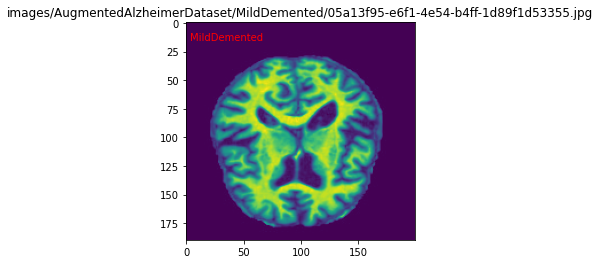

In [73]:
plt.imshow(data[1][0])
plt.annotate(data[2][0], (3., 15.), color='red', fontproperties='bold')
plt.title(data[0][0])

Text(0.5, 1.0, 'images/AugmentedAlzheimerDataset/MildDemented/9b3136e0-e14f-4126-8af5-93c51c17ad1a.jpg')

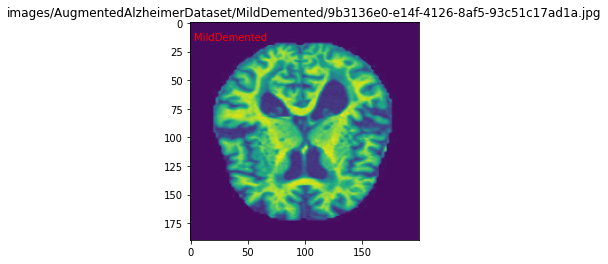

In [72]:
plt.imshow(data[1][8959])
plt.annotate(data[2][8959], (3., 15.), color='red', fontproperties='bold')
plt.title(data[0][8959])

Text(0.5, 1.0, 'images/AugmentedAlzheimerDataset/VeryMildDemented/591c4b27-b538-4bd2-a28b-1782ebaa5e16.jpg')

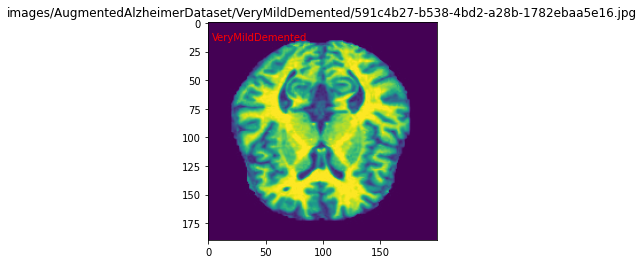

In [62]:
plt.imshow(data[1][15000])
plt.annotate(data[2][15000], (3., 15.), color='red', fontproperties='bold')
plt.title(data[0][15000])